# PNG to Nifti conversion: Playground for testing conversion functionality

### Requirements

- numpy

- os

- nibabel

- pillow

- matplotlib


In [14]:
import os
import numpy as np
import nibabel as nib   #Check that you have nibabel
from PIL import Image
import matplotlib.pyplot as plt

## Loading data and printing data shape

In [4]:
BASE = os.getcwd()
IMG_FILENAME = 'rt1.nii'
IMG_PATH = os.path.join(BASE, IMG_FILENAME)
img = nib.load(IMG_PATH)
header = img.header
IMG_DATA =  img.get_fdata()


## Attributes types of a .nii file

Important attributes for conversion and data display:

- header
- affine
- dataobj

In [7]:
#print(img.__dict__.keys())

In [8]:
#print(img.header)

## Testing converting .nifti data array (ndarray type) to nifti image

In [9]:
TEST_NII = nib.Nifti1Image(IMG_DATA, affine=img.affine, header=img.header)

In [10]:
nib.save(TEST_NII, 'test_nii.nii')

Text(0.5, 0.98, 'Center slices for EPI image')

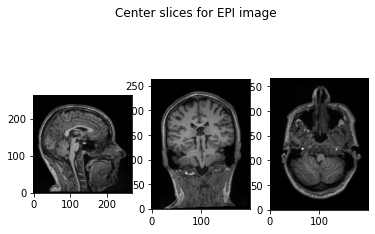

In [16]:
# Visualization helper function from 
# https://nipy.org/nibabel/coordinate_systems.html


def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = IMG_DATA[100, :, :]
slice_1 = IMG_DATA[:, 100, :]
slice_2 = IMG_DATA[:, :, 100]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")  

## .png images

In [17]:
#print(IMG_DATA.shape)
test_png = Image.open(BASE + '/png-imgs/rt1_z001.png')
#print(test_png.size)
test_arr = np.asarray(test_png)
#print(test_arr.shape)
test_arr = np.expand_dims(test_arr, 2)
#print(test_arr.shape)


test_2 = Image.open(BASE + '/png-imgs/rt1_z002.png')
test_2 = np.expand_dims(np.asarray(test_2),2)
#print(test_2.shape)

conc = np.concatenate((test_arr, test_2), axis = 2)
conc.shape


(200, 267, 2)

In [18]:
imgs = os.listdir('png-imgs')
#print(sorted(imgs)[:4])

## Stacking .png slices

In [19]:
full_arr = np.empty((200,267,1))
#print(full_arr.shape)

imgs = os.listdir('png-imgs')
#print(len(imgs))

img_base = f'{BASE}/png-imgs'

open_img = Image.open
for img_name in sorted(imgs):
    img_png = open_img(f'{img_base}/{img_name}')
    img_arr = np.expand_dims(np.asarray(img_png), 2)
    full_arr = np.concatenate((full_arr, img_arr), axis = 2)

full_arr = full_arr[:,:,1:]
#print(full_arr.shape)
    

Text(0.5, 0.98, 'Center slices for EPI image')

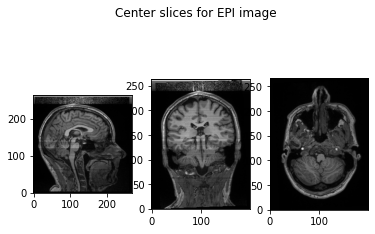

In [24]:
#print(img.affine)

affine = img.affine.copy()
affine[:, -1] = -100 
img_nii = nib.Nifti1Image(full_arr, affine = affine)
nib.save(img_nii, 'test_nii.nii')
test_data = nib.load('test_nii.nii').get_fdata()



slice_0 = test_data[100, :, :]
slice_1 = test_data[:, 100, :]
slice_2 = test_data[:, :, 100]
show_slices([slice_0, slice_1, slice_2])

plt.suptitle("Center slices for EPI image") 

In [22]:
#img.affine

In [23]:
#img.dataobj[100,100,5]

In [21]:
#test_data[16, : , :].shape